In [11]:
# Dataset - 1 : Random Forest Credit Risk Classification Dataset

# Step 1: Import Libraries
# Explanation:
# This cell imports all the necessary libraries for data manipulation, visualization, model building, evaluation, and hyperparameter tuning.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import GridSearchCV, cross_val_score

In [12]:
# Step 2: Load the Datasets
# Explanation:
# This cell loads both customer_data.csv and payment_data.csv into pandas DataFrames.
# It includes error handling in case the files are not found. The first few rows of each DataFrame
# are printed to give an initial look at the data. Make sure you have downloaded both datasets from
# Kaggle and placed them in the same directory as your Colab notebook or provide the correct paths.

# Load the customer data
try:
    customer_data = pd.read_csv('customer_data.csv')
except FileNotFoundError:
    print("Error: customer_data.csv not found. Make sure the file is in the correct location.")
    exit()

# Load the payment data
try:
    payment_data = pd.read_csv('payment_data.csv')
except FileNotFoundError:
    print("Error: payment_data.csv not found. Make sure the file is in the correct location.")
    exit()

# Display the first few rows of each dataset
print("First 5 rows of customer_data:")
print(customer_data.head())
print("\nFirst 5 rows of payment_data:")
print(payment_data.head())

First 5 rows of customer_data:
   label        id  fea_1   fea_2  fea_3     fea_4  fea_5  fea_6  fea_7  \
0      1  54982665      5  1245.5      3   77000.0      2     15      5   
1      0  59004779      4  1277.0      1  113000.0      2      8     -1   
2      0  58990862      7  1298.0      1  110000.0      2     11     -1   
3      1  58995168      7  1335.5      1  151000.0      2     11      5   
4      0  54987320      7     NaN      2   59000.0      2     11      5   

   fea_8  fea_9  fea_10      fea_11  
0    109      5  151300  244.948974  
1    100      3  341759  207.173840  
2    101      5   72001    1.000000  
3    110      3   60084    1.000000  
4    108      4  450081  197.403141  

First 5 rows of payment_data:
         id  OVD_t1  OVD_t2  OVD_t3  OVD_sum  pay_normal  prod_code  \
0  58987402       0       0       0        0           1         10   
1  58995151       0       0       0        0           1          5   
2  58997200       0       0       0        0  

In [13]:
# Step 3: Merge the Datasets
# Explanation:
# This cell merges customer_data and payment_data using the pd.merge() function.
# The on='id' argument specifies that the merge should happen based on the common 'id' column.
# how='inner' ensures that only customers present in both datasets are included in the merged_data DataFrame.
# The first few rows and information about the merged data are then printed.

# Merge the two datasets based on the 'id' column
merged_data = pd.merge(customer_data, payment_data, on='id', how='inner')

# Display the first few rows of the merged data
print("\nFirst 5 rows of the merged data:")
print(merged_data.head())

# Get information about the merged data
print("\nInformation about the merged data:")
merged_data.info()


First 5 rows of the merged data:
   label        id  fea_1   fea_2  fea_3     fea_4  fea_5  fea_6  fea_7  \
0      1  54982665      5  1245.5      3   77000.0      2     15      5   
1      1  54982665      5  1245.5      3   77000.0      2     15      5   
2      1  54982665      5  1245.5      3   77000.0      2     15      5   
3      1  54982665      5  1245.5      3   77000.0      2     15      5   
4      0  59004779      4  1277.0      1  113000.0      2      8     -1   

   fea_8  ...  OVD_t2  OVD_t3  OVD_sum  pay_normal  prod_code  prod_limit  \
0    109  ...       0       0        0           9         10     60500.0   
1    109  ...       0       0        0          18         10         NaN   
2    109  ...       0       0        0           1          5         NaN   
3    109  ...       2      26    11906           6         10         NaN   
4    100  ...       0       0        0           4          6         NaN   

   update_date  new_balance  highest_balance  report

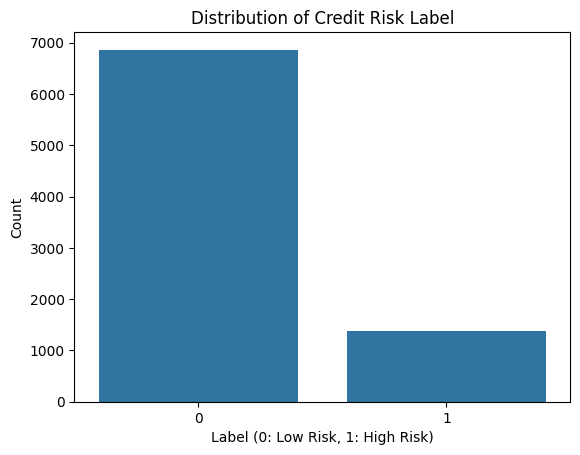


Categorical columns to encode: ['fea_1', 'fea_3', 'fea_5', 'fea_6', 'fea_7', 'fea_9', 'prod_code']
Encoded column: fea_1 - Classes: [1 2 4 5 6 7]
Encoded column: fea_3 - Classes: [1 2 3]
Encoded column: fea_5 - Classes: [1 2]
Encoded column: fea_6 - Classes: [ 3  4  5  6  8  9 11 12 15 16]
Encoded column: fea_7 - Classes: [-1  1  2  3  4  5  7  8  9 10]
Encoded column: fea_9 - Classes: [1 2 3 4 5]
Encoded column: prod_code - Classes: [ 0  1  2  3  4  5  6  7  8  9 10 12 13 15 17 19 22 24 25 26 27]

Dropped date columns: []

Missing values before handling:
label                 0
fea_1                 0
fea_2              1028
fea_3                 0
fea_4                 0
fea_5                 0
fea_6                 0
fea_7                 0
fea_8                 0
fea_9                 0
fea_10                0
fea_11                0
OVD_t1                0
OVD_t2                0
OVD_t3                0
OVD_sum               0
pay_normal            0
prod_code             0
prod_

In [14]:
# Step 4: Data Exploration and Preprocessing
# Explanation:
# - Target Variable Exploration: Visualizes the distribution of the label column to understand the balance
#   between high and low-risk customers.
# - Drop 'id' Column: Removes the 'id' column as it's a unique identifier and doesn't contribute
#   to the model's predictive power.
# - Identify Categorical Columns: Specifies the columns that are known to be categorical
#   (including 'prod_code' from payment_data).
# - Label Encoding: Converts the categorical columns into numerical representations using LabelEncoder.
#   The unique classes in each encoded column are printed.
# - Handle Date Columns: For simplicity in this basic example, the 'update_date' and 'report_date'
#   columns are dropped. In a real-world scenario, you might want to extract meaningful features from these dates (e.g., time since last payment, time since account update).
# - Handle Missing Values: Checks for missing values and then drops any rows containing them for simplicity.
#   More sophisticated methods like imputation could be used.

# Explore the target variable distribution
sns.countplot(x='label', data=merged_data)
plt.title('Distribution of Credit Risk Label')
plt.xlabel('Label (0: Low Risk, 1: High Risk)')
plt.ylabel('Count')
plt.show()

# Drop the 'id' column as it's a unique identifier and not a predictive feature
merged_data = merged_data.drop('id', axis=1)

# Identify categorical columns (initially, only in customer_data were mentioned as encoded)
categorical_cols = ['fea_1', 'fea_3', 'fea_5', 'fea_6', 'fea_7', 'fea_9', 'prod_code']

# Handle categorical variables using Label Encoding
print("\nCategorical columns to encode:", [col for col in categorical_cols if col in merged_data.columns])
for col in [col for col in categorical_cols if col in merged_data.columns]:
    le = LabelEncoder()
    merged_data[col] = le.fit_transform(merged_data[col])
    print(f"Encoded column: {col} - Classes: {le.classes_}")

# Handle potential date columns (convert to numerical or extract features)
# For simplicity, we'll just drop them for this basic example.
date_cols = ['update_date', 'report_date']
merged_data = merged_data.drop(columns=[col for col in date_cols if col in merged_data.columns], errors='ignore')
print("\nDropped date columns:", [col for col in date_cols if col in merged_data.columns])

# Handle missing values (check and drop rows with any missing values for simplicity)
print("\nMissing values before handling:")
print(merged_data.isnull().sum())
merged_data = merged_data.dropna()
print("\nMissing values after handling:")
print(merged_data.isnull().sum())

In [15]:
# Step 5: Separate Features and Target, and Split Data
# Explanation:
# This cell separates the merged_data into the feature matrix X (all columns except 'label') and
# the target variable y ('label' column). It then splits the data into training (70%) and testing (30%)
# sets using train_test_split. stratify=y ensures that the proportion of high and low-risk customers is
# maintained in both the training and testing sets.

# Separate features (X) and target (y)
X = merged_data.drop('label', axis=1)
y = merged_data['label']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

print("\nData split into training and testing sets.")
print(f"X_train shape: {X_train.shape}, y_train shape: {y_train.shape}")
print(f"X_test shape: {X_test.shape}, y_test shape: {y_test.shape}")


Data split into training and testing sets.
X_train shape: (1281, 20), y_train shape: (1281,)
X_test shape: (550, 20), y_test shape: (550,)


In [16]:
# Step 6: Initialize and Train the Random Forest Model
# Explanation:
# This cell initializes a RandomForestClassifier with 100 trees, a fixed random_state for reproducibility,
# and class_weight='balanced' to handle potential class imbalance in the 'label' column.
# The model is then trained using the training features (X_train) and the training target (y_train).

# Initialize the Random Forest model with initial parameters
rf_model = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')

# Train the Random Forest model on the training data
rf_model.fit(X_train, y_train)

print("\nRandom Forest model trained.")


Random Forest model trained.



Accuracy of the Random Forest model: 0.8855

Classification Report:
              precision    recall  f1-score   support

           0       0.89      1.00      0.94       479
           1       0.90      0.13      0.22        71

    accuracy                           0.89       550
   macro avg       0.89      0.56      0.58       550
weighted avg       0.89      0.89      0.85       550


Confusion Matrix:


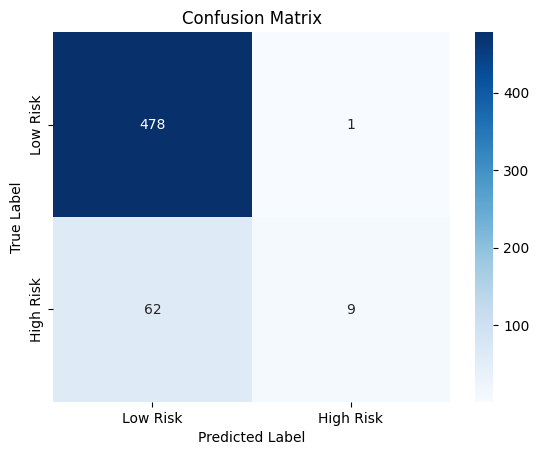

In [17]:
# Step 7: Make Predictions and Evaluate the Model
# Explanation:
# This cell uses the trained rf_model to make predictions on the unseen test data (X_test).
# It then evaluates the model's performance using accuracy, a classification report (precision, recall,
# F1-score), and a confusion matrix visualized as a heatmap. The class labels in the confusion matrix
# are set to 'Low Risk' and 'High Risk' based on the problem description.

# Make predictions on the test data
y_pred = rf_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"\nAccuracy of the Random Forest model: {accuracy:.4f}")

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nConfusion Matrix:")
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Low Risk', 'High Risk'], yticklabels=['Low Risk', 'High Risk'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

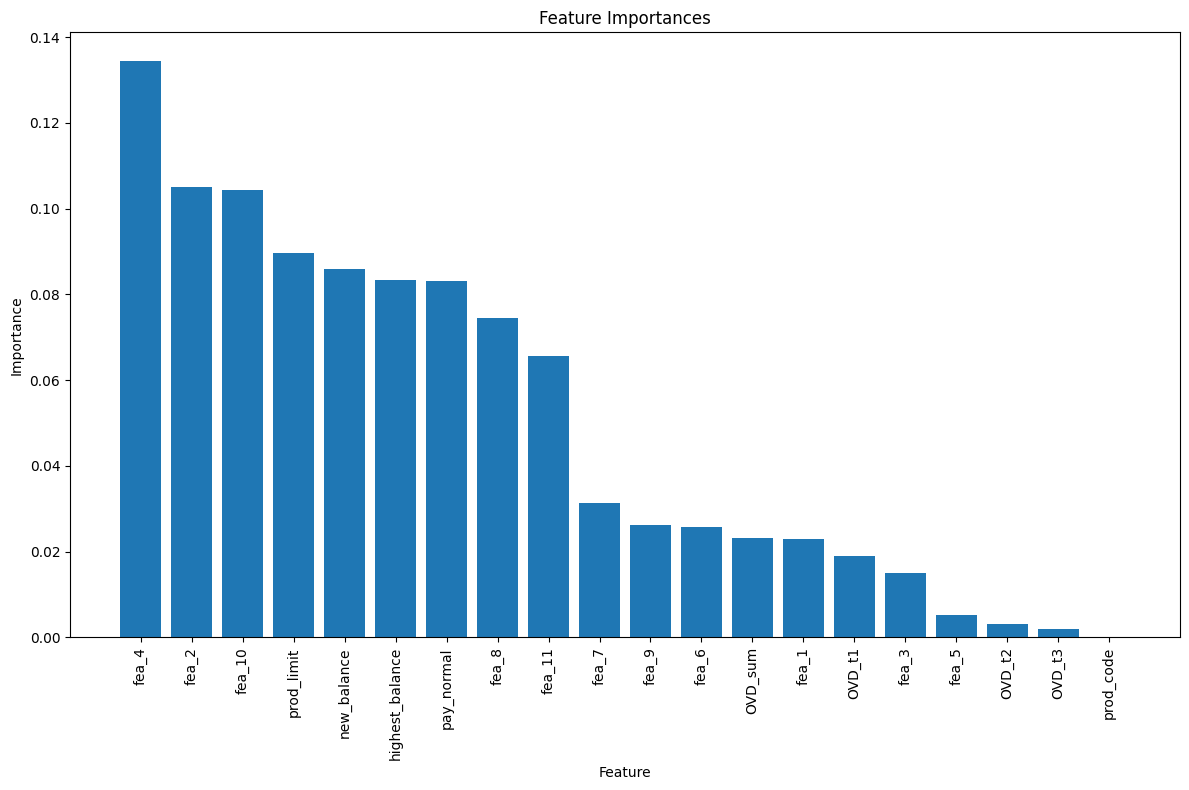

In [18]:
# Step 8: Analyze Feature Importance
# Explanation:
# This cell extracts the feature importances from the trained Random Forest model.
# It then sorts these importances and visualizes them using a bar plot, showing which features
# were most influential in the model's predictions.

# Analyze feature importance
feature_importances = rf_model.feature_importances_
feature_names = X.columns

# Sort features by importance
sorted_indices = np.argsort(feature_importances)[::-1]

plt.figure(figsize=(12, 8))
plt.title("Feature Importances")
plt.bar(range(X.shape[1]), feature_importances[sorted_indices], align="center")
plt.xticks(range(X.shape[1]), feature_names[sorted_indices], rotation=90)
plt.xlabel("Feature")
plt.ylabel("Importance")
plt.tight_layout()
plt.show()

In [19]:
# Step 9: Hyperparameter Tuning using GridSearchCV
# Explanation:
# This cell performs hyperparameter tuning for the Random Forest model using GridSearchCV.
# It defines a range of hyperparameters to test, performs 3-fold cross-validation on the training data
# to evaluate each combination based on the F1-score, and identifies the best set of hyperparameters.
# The best parameters and the corresponding best F1-score are printed, and the best trained model is
# stored in best_rf_model.

# Define the parameter grid to search
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 5, 10],
    'min_samples_leaf': [1, 5, 10],
    'criterion': ['gini', 'entropy']
}

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=3, scoring='f1', n_jobs=-1)

# Fit GridSearchCV to the training data
grid_search.fit(X_train, y_train)

# Print the best parameters and the best score
print("\nBest Hyperparameters:", grid_search.best_params_)
print("Best F1-score:", grid_search.best_score_)

# Get the best model
best_rf_model = grid_search.best_estimator_


Best Hyperparameters: {'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 5, 'n_estimators': 100}
Best F1-score: 0.36894903015894315



Accuracy of the Optimized Random Forest model: 0.7964

Classification Report (Optimized Model):
              precision    recall  f1-score   support

           0       0.91      0.85      0.88       479
           1       0.30      0.44      0.36        71

    accuracy                           0.80       550
   macro avg       0.61      0.64      0.62       550
weighted avg       0.83      0.80      0.81       550


Confusion Matrix (Optimized Model):


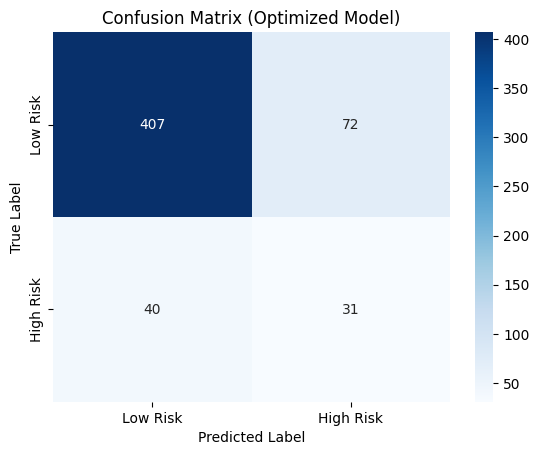


Cross-validation F1-scores for the best model: [0.22222222 0.37704918 0.34       0.25373134 0.28099174]
Mean cross-validation F1-score of the best model: 0.2948


In [20]:
# Step 10: Evaluate the Optimized Model
# Explanation:
# This final cell evaluates the performance of the Random Forest model trained with the best
# hyperparameters found by GridSearchCV on the test data. It calculates and prints the accuracy,
# classification report, and confusion matrix for the optimized model. Additionally, it performs
# 5-fold cross-validation on the entire dataset using the best model to get a more robust estimate
# of its generalization performance.

# Make predictions using the best model
y_pred_best = best_rf_model.predict(X_test)

# Evaluate the optimized model
accuracy_best = accuracy_score(y_test, y_pred_best)
print(f"\nAccuracy of the Optimized Random Forest model: {accuracy_best:.4f}")

print("\nClassification Report (Optimized Model):")
print(classification_report(y_test, y_pred_best))

print("\nConfusion Matrix (Optimized Model):")
cm_best = confusion_matrix(y_test, y_pred_best)
sns.heatmap(cm_best, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Low Risk', 'High Risk'], yticklabels=['Low Risk', 'High Risk'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix (Optimized Model)')
plt.show()

# Perform cross-validation on the best model
cv_scores_best = cross_val_score(best_rf_model, X, y, cv=5, scoring='f1')
print(f"\nCross-validation F1-scores for the best model: {cv_scores_best}")
print(f"Mean cross-validation F1-score of the best model: {cv_scores_best.mean():.4f}")